In [9]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas 


In [4]:
pip install scikit-learn --trusted-host files.pythonhosted.org --trusted-host pypi.org --trusted-host pypi.python.org

     | 12.1 MB 17.6 MB/s 0:00:000m
     \ 39.4 MB 28.0 MB/s 0:00:01
  Using cached threadpoolctl-3.5.0-py3-none-any.whl
     - 301.8 kB 64.7 MB/s 0:00:00

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
files = pandas.read_csv('Gold/prediction.csv')

actual_values = files["Note"]
predicted_values = files["prediction_numerique"]

actual_values.head(10)

0    5
1    5
2    5
3    5
4    5
5    3
6    5
7    5
8    5
9    3
Name: Note, dtype: int64

In [21]:
cnf_matrix = confusion_matrix(actual_values,predicted_values)

cnf_matrix

array([[  3,   0,   3,   0,   0],
       [  0,   9,   0,   0,   0],
       [  0,   7,   7,   2,   0],
       [  0,   6,   6,  40,  18],
       [  0,   8,  19, 111, 139]])

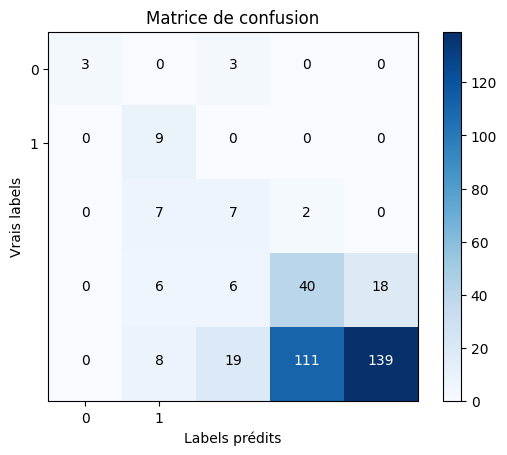

NameError: name 'actual' is not defined

In [22]:

classes = range(0,2)
plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

# outcome values order in sklearn
tn, fp, fn ,tp = confusion_matrix(actual_values,predicted_values).reshape(-1)
print('Valeurs de TN, FP, FN, TP : \n',tn, fp, fn, tp)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual_values,predicted_values)
print('Rapport de Classification  : \n',matrix)

In [13]:
df['Note'] = df['Note'].str.extract(r'(\d+)').astype(int)

In [16]:
def nettoyer_texte(texte):

    texte = unidecode(texte)
    texte = re.sub(r'[^a-zA-Z\s]', '', texte)
    texte = re.sub(r'\s+', ' ', texte).strip()
    texte = texte.lower()
    return texte

df['Commentaire'] = df['Commentaire'].apply(nettoyer_texte)

In [17]:
print(df.isnull().sum())

Auteur         0
Date           0
Commentaire    0
Note           0
dtype: int64


In [18]:
df = df.drop_duplicates()

In [19]:
df.head(30)

,Auteur,Date,Commentaire,Note
0,JULIE,2024-12-11,agreables a porter et bon amorti,5
1,PIERRETTE,2024-12-11,bon produit,5
2,VANESSA,2024-12-10,bon rapport qualite prix,5
3,JEAN CHARLES,2024-12-10,tiens bien au pied,5
4,BARBARA,2024-12-10,utilisee pour la salle de sport et sur tapis d...,5
5,VIRGINIE,2024-12-09,semelle dure materiaux passables pour la trans...,3
6,NADINE,2024-12-10,achetees pour le travail debout h par jour par...,5
7,Florence,2024-12-09,sa fait longtemps que je prend ce modele et j ...,5
8,Margaux,2024-12-09,chaussures pas cher et qui fait le taf pour co...,5
9,Pascale,2024-12-08,non seulement de glisser sur sol mouille la se...,3


In [20]:
df.to_csv('Silver/data_pretraité.csv', index=False, encoding='utf-8')